<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/SVHN_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow

In [15]:
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


In [16]:
# Load dataset SVHN (cropped)
(ds_train, ds_test), ds_info = tfds.load(
    'svhn_cropped',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

NUM_CLASSES = ds_info.features['label'].num_classes

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalisasi [0, 1]
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

BATCH_SIZE = 64
ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [17]:
from tensorflow.keras import layers, models

mlp_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

mlp_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
mlp_history = mlp_model.fit(ds_train, epochs=10, validation_data=ds_test)


Epoch 1/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.1874 - loss: 2.2455 - val_accuracy: 0.4855 - val_loss: 1.5837
Epoch 2/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.5246 - loss: 1.4372 - val_accuracy: 0.5773 - val_loss: 1.3507
Epoch 3/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.6116 - loss: 1.2238 - val_accuracy: 0.6185 - val_loss: 1.2543
Epoch 4/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.6499 - loss: 1.1270 - val_accuracy: 0.6393 - val_loss: 1.1976
Epoch 5/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.6706 - loss: 1.0711 - val_accuracy: 0.6568 - val_loss: 1.1469
Epoch 6/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - accuracy: 0.6862 - loss: 1.0291 - val_accuracy: 0.6675 - val_loss: 1.1233
Epoch 7/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.6969 - loss: 0.9997 - val_accuracy: 0.6764 - val_loss: 1.0985
Epoch 8/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.7043 -

In [19]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
cnn_history = cnn_model.fit(ds_train, epochs=10, validation_data=ds_test)


Epoch 1/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 110s 94ms/step - accuracy: 0.5810 - loss: 1.2730 - val_accuracy: 0.8286 - val_loss: 0.6242
Epoch 2/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 134s 87ms/step - accuracy: 0.8635 - loss: 0.4886 - val_accuracy: 0.8617 - val_loss: 0.4840
Epoch 3/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 144s 90ms/step - accuracy: 0.8848 - loss: 0.3955 - val_accuracy: 0.8733 - val_loss: 0.4417
Epoch 4/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 146s 94ms/step - accuracy: 0.8990 - loss: 0.3458 - val_accuracy: 0.8743 - val_loss: 0.4331
Epoch 5/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 144s 95ms/step - accuracy: 0.9103 - loss: 0.3110 - val_accuracy: 0.8846 - val_loss: 0.4117
Epoch 6/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 98s 86ms/step - accuracy: 0.9183 - loss: 0.2798 - val_accuracy: 0.8868 - val_loss: 0.4094
Epoch 7/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 108s 95ms/step - accuracy: 0.9271 - loss: 0.2533 - val_accuracy: 0.8813 - val_loss: 0.4298
Epoch 8/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 132s 86ms/step - accuracy: 0

In [27]:
def evaluate_model(model, ds_test, name="Model"):
    # Gabungkan semua batch jadi array
    X_test = []
    Y_test = []
    for images, labels in ds_test:
        X_test.append(images)
        Y_test.append(labels)

    X_test = tf.concat(X_test, axis=0)
    Y_test = tf.concat(Y_test, axis=0)

    preds = model.predict(X_test, verbose=0)
    y_pred = np.argmax(preds, axis=1)
    y_true = np.argmax(Y_test.numpy(), axis=1)

    print(f"📊 Evaluasi untuk {name}")
    print(classification_report(y_true, y_pred, digits=4))

    y_true_ohe = tf.one_hot(y_true, depth=NUM_CLASSES).numpy()
    auc = roc_auc_score(y_true_ohe, preds, multi_class='ovr')
    print(f"AUC Score: {auc:.4f}")

    return y_true, y_pred

y_true_mlp, y_pred_mlp = evaluate_model(mlp_model, ds_test, name="MLP")
y_true_cnn, y_pred_cnn = evaluate_model(cnn_model, ds_test, name="CNN")



📊 Evaluasi untuk MLP
              precision    recall  f1-score   support

           0     0.6320    0.6233    0.6276      1744
           1     0.7480    0.8551    0.7980      5099
           2     0.7528    0.7580    0.7554      4149
           3     0.6580    0.6270    0.6421      2882
           4     0.7333    0.7618    0.7473      2523
           5     0.6416    0.6443    0.6429      2384
           6     0.5942    0.6474    0.6197      1977
           7     0.7608    0.6270    0.6875      2019
           8     0.6479    0.5542    0.5974      1660
           9     0.7129    0.5837    0.6418      1595

    accuracy                         0.7012     26032
   macro avg     0.6881    0.6682    0.6760     26032
weighted avg     0.7006    0.7012    0.6989     26032

AUC Score: 0.9315
📊 Evaluasi untuk CNN
              precision    recall  f1-score   support

           0     0.8669    0.8847    0.8757      1744
           1     0.9236    0.9288    0.9262      5099
           2     0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━

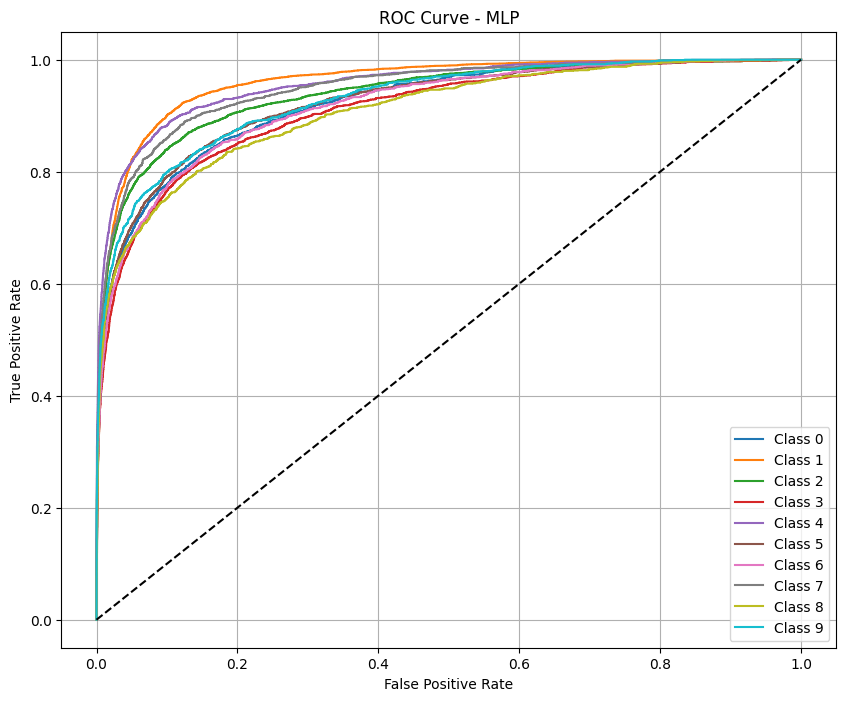

In [34]:
def plot_roc(model, ds_test, name="Model", num_classes=10):
    from sklearn.preprocessing import label_binarize

    y_true = []
    y_scores = []

    for images, labels in ds_test:
        preds = model.predict(images)
        y_scores.extend(preds)
        y_true.extend(np.argmax(labels.numpy(), axis=1))

    y_true = label_binarize(y_true, classes=list(range(num_classes)))
    y_scores = np.array(y_scores)

    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_scores[:, i])
        plt.plot(fpr, tpr, label=f'Class {i}')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Plot ROC untuk MLP
plot_roc(mlp_model, ds_test, name="MLP")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━

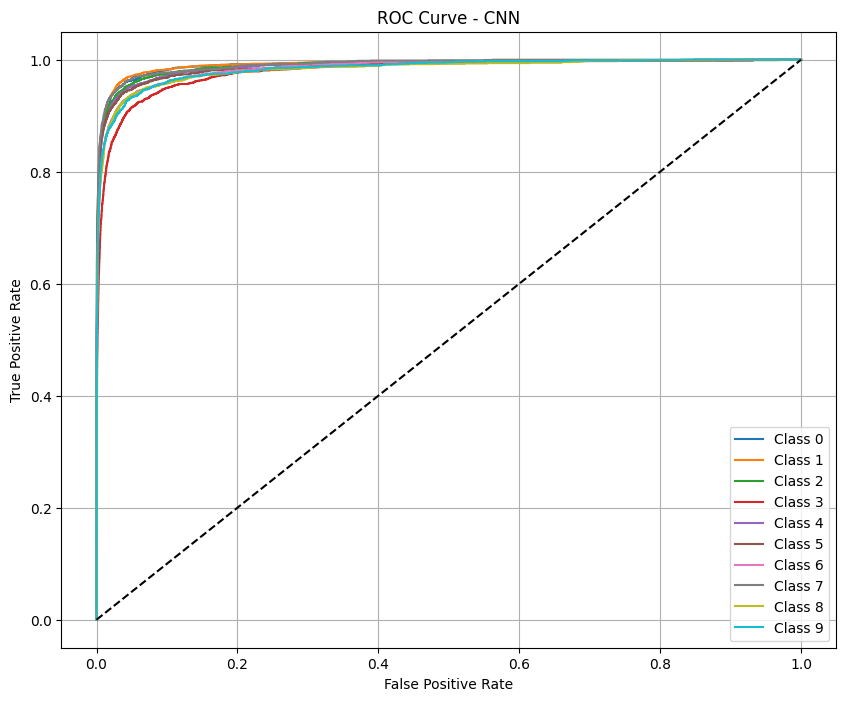

In [35]:
# Plot ROC untuk CNN
plot_roc(cnn_model, ds_test, name="CNN")


## MLP (Multilayer Perceptron)

Dense Layer (Fully Connected)
Setiap neuron di dense layer melakukan operasi linear sebagai berikut:

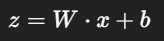

Aktivasi ReLU (Rectified Linear Unit)
Fungsi aktivasi ReLU yang umum digunakan pada MLP untuk menangani non-linearitas adalah:

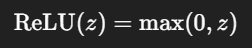

Fungsi ini membiarkan nilai positif tetap, dan mematikan nilai negatif menjadi nol. ReLU memungkinkan model untuk belajar lebih cepat dan lebih efisien.

Softmax untuk Klasifikasi Multi-Kelas
Pada layer output, Softmax digunakan untuk mengubah output logit menjadi probabilitas:

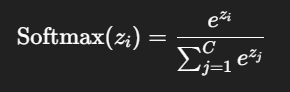

z
i
  adalah logit untuk kelas ke-
𝑖
i.

𝐶
C adalah jumlah kelas (misalnya, 10 kelas untuk SVHN).

Softmax memastikan bahwa output dari model untuk setiap kelas adalah nilai probabilitas yang totalnya 1.

## CNN (Convolutional Neural Network)

Convolution Operation
Pada CNN, filter kernel diterapkan untuk mendeteksi fitur lokal pada gambar:

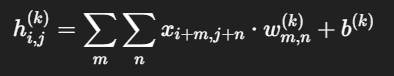

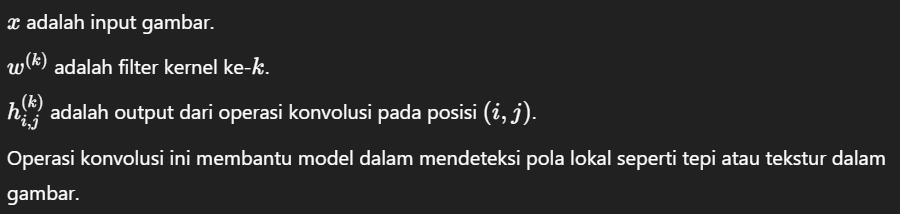

MaxPooling
MaxPooling digunakan untuk mereduksi dimensi dan mempertahankan fitur penting dengan memilih nilai maksimum dari area tertentu dalam gambar:

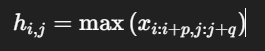

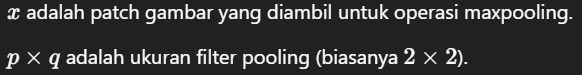



# Pytorch

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


In [37]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = datasets.SVHN(root='./data', split='train', download=True, transform=transform)
test_set = datasets.SVHN(root='./data', split='test', download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)


100%|██████████| 182M/182M [00:20<00:00, 8.87MB/s]
100%|██████████| 64.3M/64.3M [00:13<00:00, 4.78MB/s]


In [38]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [39]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [40]:
def train_model(model, loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in loader:
            labels = labels.long()
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(loader):.4f}")


In [41]:
def evaluate(model, loader):
    model.eval()
    y_true = []
    y_pred = []
    y_probs = []
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            probs = F.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())
            y_probs.extend(probs.numpy())

    y_true_bin = label_binarize(y_true, classes=range(10))
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    f1_squared = f1 ** 2
    auc = roc_auc_score(y_true_bin, y_probs, average='macro', multi_class='ovr')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"F1 Squared: {f1_squared:.4f}")
    print(f"AUC: {auc:.4f}")
    return y_true, y_probs


In [42]:
def plot_roc_curve(y_true, y_probs):
    y_true_bin = label_binarize(y_true, classes=range(10))
    plt.figure(figsize=(10, 8))
    for i in range(10):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], np.array(y_probs)[:, i])
        plt.plot(fpr, tpr, label=f"Class {i}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()


Epoch 1, Loss: 1.1477
Epoch 2, Loss: 0.7905
Epoch 3, Loss: 0.6873
Epoch 4, Loss: 0.6245
Epoch 5, Loss: 0.5786
Accuracy: 0.7729
Precision: 0.7622
Recall: 0.7504
F1 Score: 0.7520
F1 Squared: 0.5656
AUC: 0.9593


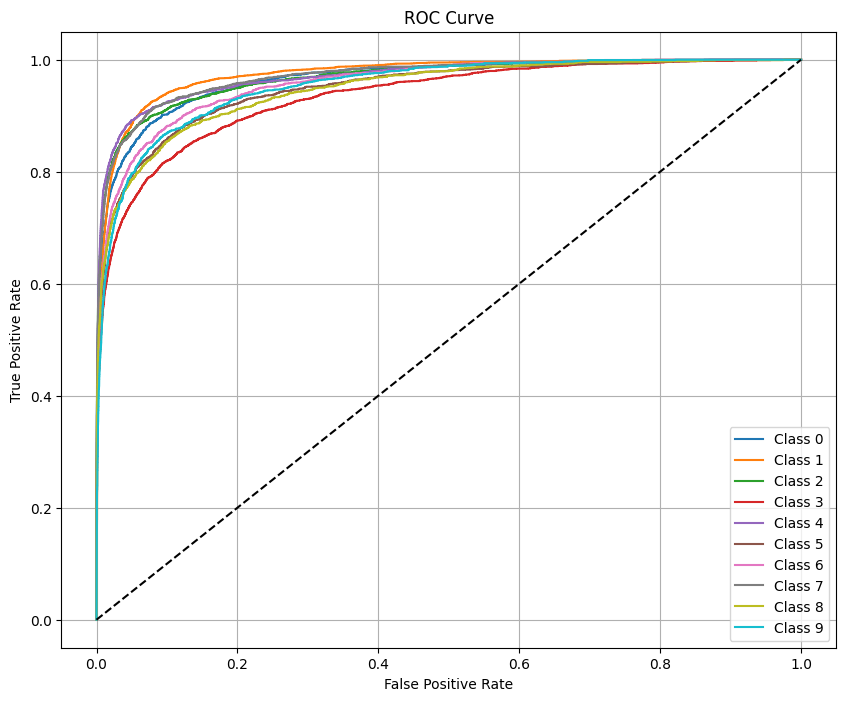

In [43]:
# Untuk MLP
mlp_model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)
train_model(mlp_model, train_loader, criterion, optimizer, epochs=5)
y_true_mlp, y_probs_mlp = evaluate(mlp_model, test_loader)
plot_roc_curve(y_true_mlp, y_probs_mlp)


Epoch 1, Loss: 0.8662
Epoch 2, Loss: 0.4827
Epoch 3, Loss: 0.3978
Epoch 4, Loss: 0.3431
Epoch 5, Loss: 0.3063
Accuracy: 0.8829
Precision: 0.8757
Recall: 0.8684
F1 Score: 0.8711
F1 Squared: 0.7589
AUC: 0.9876


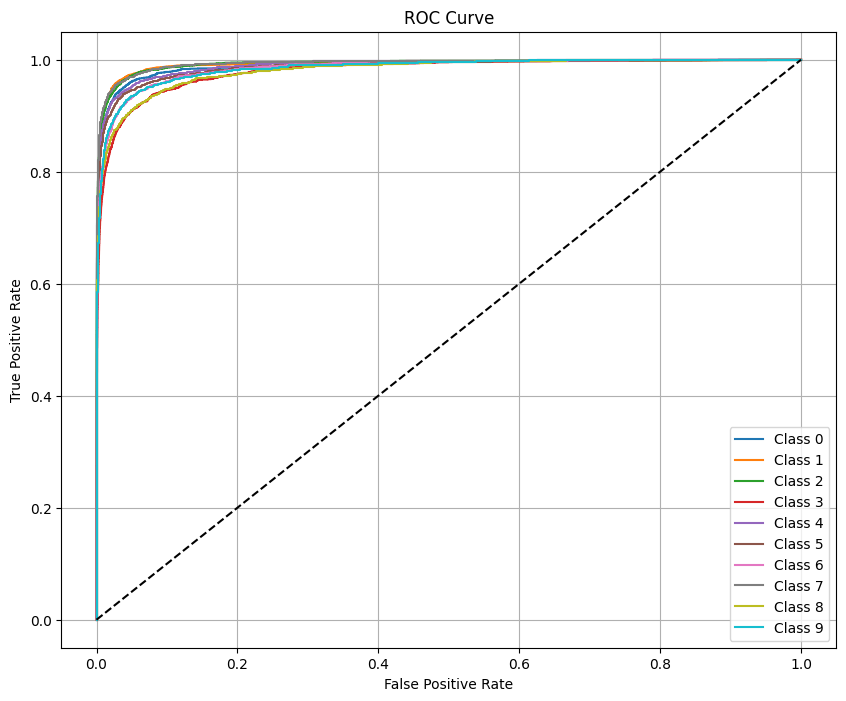

In [44]:
# Untuk CNN
cnn_model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
train_model(cnn_model, train_loader, criterion, optimizer, epochs=5)
y_true_cnn, y_probs_cnn = evaluate(cnn_model, test_loader)
plot_roc_curve(y_true_cnn, y_probs_cnn)


## MLP (Multilayer Perceptron)

Dense Layer (Fully Connected)
Setiap neuron di dense layer melakukan operasi linear sebagai berikut:

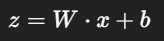

Aktivasi ReLU (Rectified Linear Unit)
Fungsi aktivasi ReLU yang umum digunakan pada MLP untuk menangani non-linearitas adalah:

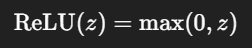

Fungsi ini membiarkan nilai positif tetap, dan mematikan nilai negatif menjadi nol. ReLU memungkinkan model untuk belajar lebih cepat dan lebih efisien.

Softmax untuk Klasifikasi Multi-Kelas
Pada layer output, Softmax digunakan untuk mengubah output logit menjadi probabilitas:

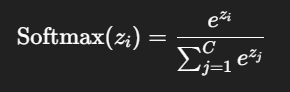

z
i
  adalah logit untuk kelas ke-
𝑖
i.

𝐶
C adalah jumlah kelas (misalnya, 10 kelas untuk SVHN).

Softmax memastikan bahwa output dari model untuk setiap kelas adalah nilai probabilitas yang totalnya 1.

## CNN (Convolutional Neural Network)

Convolution Operation
Pada CNN, filter kernel diterapkan untuk mendeteksi fitur lokal pada gambar:

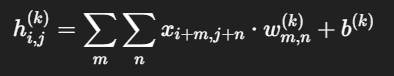

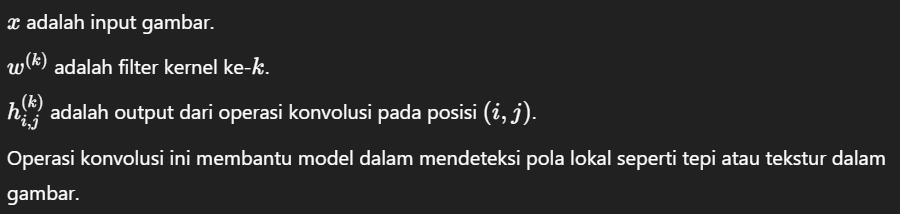

MaxPooling
MaxPooling digunakan untuk mereduksi dimensi dan mempertahankan fitur penting dengan memilih nilai maksimum dari area tertentu dalam gambar:

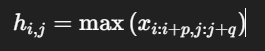

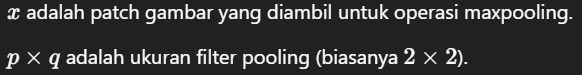

